In [1]:
import nbsetup
import scipy as sp
import ensemblepy as ep
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
def create_data(funcs):
    analysis = []
    for name, (func, raunge) in funcs.items():
        for x in raunge:
            data = func(x)
            e = ep.Collection(data)
            d = e.comparison()
            d['func'] = name
            d['x'] = x
            d['maxent'] = e.measures['maxent']
            d['pooled'] = e.measures['pooled']
            analysis.append(d)
    return pd.DataFrame(analysis)

def plotit(df):
    uniques = df['func'].unique()
    
    fig, ax = plt.subplots(len(uniques), 5, figsize=(10,5), sharex=False, sharey='row')
    #plt.subplots_adjust(hspace = 0.3, wspace=0.2)
    plt.tight_layout(h_pad=2.2)
    
    for i, f in enumerate(uniques):
        udf = df[df['func']==f]
        ylim = (-0.05,max(udf['jsd'].max(),1.05))
        alt = np.sqrt((udf['incoherence']**2)*udf['pooled']/udf['maxent'])
        
        setup = (
            (0, 'Incoherence (I)', 'solid', 'purple', udf['incoherence']),
            (0, 'T (I without pooled)', 'dashed', 'orange', alt),
            
            (1, 'Jensen-Shannon (JS)', 'solid', 'red', udf['jsd']),
            (1, 'JS/Hmax', 'dashed', 'teal', udf['njsd']),
            
            (2, 'Total variation', 'solid', 'saddlebrown', udf['total_var']),
            (2, 'Earth Movers', 'dashed', 'orange', udf['wasserstein']),
            
            (3, 'Kullback–Leibler', 'solid', 'cornflowerblue', udf['kl']),
            (3, 'Hellinger', 'dashed', 'darkgreen', udf['hellinger']),
            
            (4, 'Max GF Complexity', 'solid', 'black', udf['max(gfc)']),
            (4, 'Chi^2 p-value', 'dashed', 'green', udf['chi2 p']),
        )
        for j, s in enumerate(setup):
            
            g = sns.lineplot(x=udf['x'], y=s[4], ax=ax[i][s[0]], label=s[1], legend=i==0, color=s[3], linestyle=s[2])
            g.set(ylabel=None, ylim=ylim, xlabel=None)
        
        ax[i][2].set(xlabel=f)
        
    for a in ax[0]:
        a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4))
    return fig


In [195]:
def full_range(x):
    return norm([[1,0], [(1-x),x]])*10

def empty_states(x):
    a = np.zeros(x)
    a[0] = 1
    b = np.zeros(x)
    b[1] = 1
    return norm([a,b])*10

def maximum_inc(x):
    return np.identity(x)*10

def points(x):
    return [[x,x], [0,2*x]]


def norm(data):
    for i, row in enumerate(data):
        data[i] = row/np.sum(row)
    return np.array(data)

def half_ensembles(x):
    rows = []
    for i in range(x):
        rows.append([1,1])
        rows.append([2,0])
    return norm(rows)*2

def filled_states(x):
    a = np.zeros(x)
    a[0] = 1
    b = np.ones(x)
    return norm([a,b])*10

def limit(x):
    results = []
    for i in range(x):
        results.append([1,0])
    results.append(np.ones(2))
    return norm(results)*10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


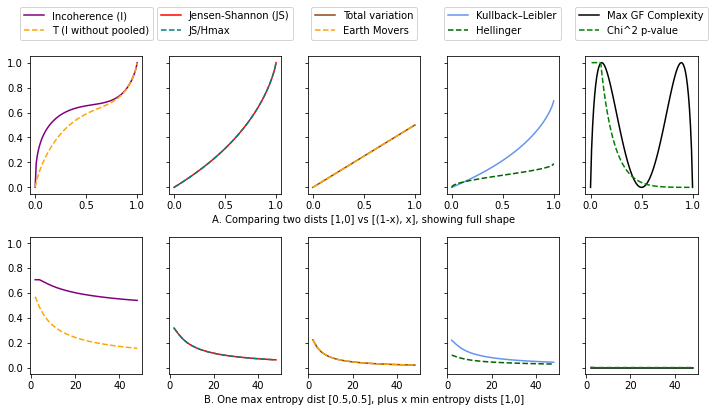

In [197]:
plotit(create_data({
    'A. Comparing two dists [1,0] vs [(1-x), x], showing full shape': (full_range, np.linspace(0,1.0,100)),
    'B. One max entropy dist [0.5,0.5], plus x min entropy dists [1,0]': (limit, range(2,50,2)),
})).savefig('discrete-AB.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


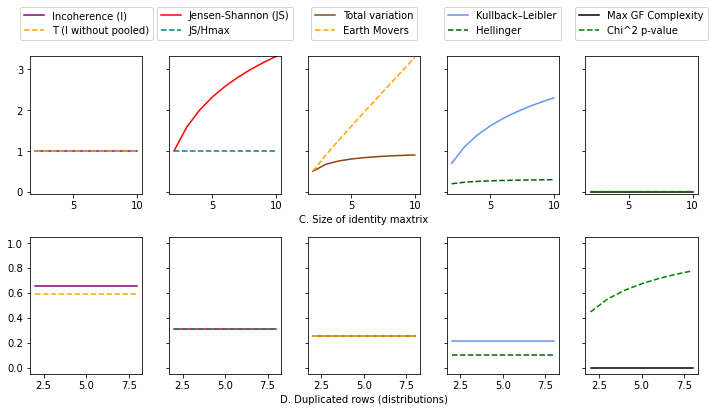

In [179]:
plotit(create_data({
    'C. Size of identity maxtrix': (maximum_inc, range(2,11)),
    'D. Duplicated rows (distributions)': (half_ensembles, range(2,9)),
})).savefig('discrete-CD.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


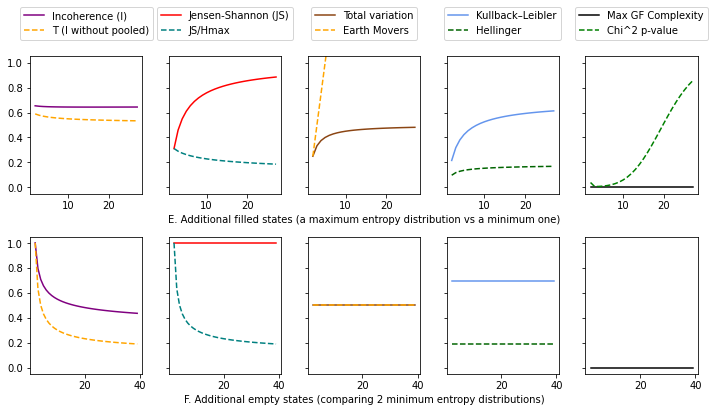

In [199]:
plotit(create_data({
    'E. Additional filled states (a maximum entropy distribution vs a minimum one)': (filled_states, range(2,28)),
    'F. Additional empty states (comparing 2 minimum entropy distributions)': (empty_states, range(2,40)),
    #'E. Multiple applied to distributions': (points, range(1,11)),
})).savefig('discrete-EF.eps')

In [5]:
for X in ([[0.9,0.1,0,0,0], [0.8,0.2,0,0,0]],
          #[[0.9,0.1,0,0,0], [0.5,0.5,0,0,0]],
          #[[0.9,0.1,0,0,0], [0.5,0.1,0.1,0.1,0.1]],
          [[0.2, 0.2, 0.2, 0.2, 0.2], [0.4, 0.0, 0.2, 0.2, 0.2]],
         ):
    e = ep.Collection(X)
    c = e.comparison()
    print(X)
    print('pooled', c['pooled'])
    print('jsd', c['jsd'])
    print('njsd', c['njsd'])
    print('jsd/pooled', c['jsd']/c['pooled'])
    print('inc', c['incoherence'])
    print('maxent', e.measures['maxent'])
    print()

[[0.9, 0.1, 0, 0, 0], [0.8, 0.2, 0, 0, 0]]
pooled 0.6098403047164004
jsd 0.014378460478078642
njsd 0.006192465869093223
jsd/pooled 0.023577419148714987
inc 0.10696239775533554
maxent 2.321928094887362

[[0.2, 0.2, 0.2, 0.2, 0.2], [0.4, 0.0, 0.2, 0.2, 0.2]]
pooled 2.246439344671016
jsd 0.12451124978365324
njsd 0.05362407649824029
jsd/pooled 0.05542604570162011
inc 0.1031541484064902
maxent 2.321928094887362



In [ ]:
# we want systems with lower entropies
# to have higher relative measures
